In [3]:

import h5py
import pandas as pd
from sklearn.model_selection import train_test_split

def segment_data(data, window_size, overlap):
    segments = []
    for i in range(0, len(data) - window_size, overlap):
        segment = data[i:i + window_size]
        segments.append(segment)
    return segments

# Read in the CSV files for each person
kieran_walking = pd.read_csv('Accelerometer_Walking_Kieran.csv')
kieran_jumping = pd.read_csv('Accelerometer_Jumping_Kieran.csv')
amir_walking = pd.read_csv('Accelerometer_Walking_Amir.csv')
amir_jumping = pd.read_csv('Accelerometer_Jumping_Amir.csv')
jack_walking = pd.read_csv('Accelerometer_Walking_Jack.csv')
jack_jumping = pd.read_csv('Accelerometer_Jumping_Jack.csv')

# Define window size and overlap (assuming 100 samples per second)
window_size = 5 * 100
overlap = window_size // 2

# Segment data into 5-second windows with 50% overlap
kieran_walking_segments = segment_data(kieran_walking.values, window_size, overlap)
kieran_jumping_segments = segment_data(kieran_jumping.values, window_size, overlap)
amir_walking_segments = segment_data(amir_walking.values, window_size, overlap)
amir_jumping_segments = segment_data(amir_jumping.values, window_size, overlap)
jack_walking_segments = segment_data(jack_walking.values, window_size, overlap)
jack_jumping_segments = segment_data(jack_jumping.values, window_size, overlap)

# Create the HDF5 file
f = h5py.File('data.h5', 'w')

# Create group for each person
jack_group = f.create_group('Jack')
kieran_group = f.create_group('Kieran')
amir_group = f.create_group('Amir')

# Store jumping and walking segments under each person's group
jack_group.create_dataset('jumping', data=jack_jumping_segments)
jack_group.create_dataset('walking', data=jack_walking_segments)
kieran_group.create_dataset('jumping', data=kieran_jumping_segments)
kieran_group.create_dataset('walking', data=kieran_walking_segments)
amir_group.create_dataset('jumping', data=amir_jumping_segments)
amir_group.create_dataset('walking', data=amir_walking_segments)

# Create dataset group
dataset_group = f.create_group('dataset')

# Shuffle and store jumping and walking segments in Training and Testing groups under dataset group
jumping_segments = kieran_jumping_segments + amir_jumping_segments + jack_jumping_segments
walking_segments = kieran_walking_segments + amir_walking_segments + jack_walking_segments

shuffled_jumping_segments = train_test_split(jumping_segments, test_size=0.1, random_state=42)
shuffled_walking_segments = train_test_split(walking_segments, test_size=0.1, random_state=42)

# Store shuffled jumping and walking segments in Training group
training_group = dataset_group.create_group('Train')
training_group.create_dataset('Jumping', data=shuffled_jumping_segments[0])
training_group.create_dataset('Walking', data=shuffled_walking_segments[0])

# Store shuffled jumping and walking segments in Testing group
testing_group = dataset_group.create_group('Test')
testing_group.create_dataset('Jumping', data=shuffled_jumping_segments[1])
testing_group.create_dataset('Walking', data=shuffled_walking_segments[1])

# Close the HDF5 file
f.close()

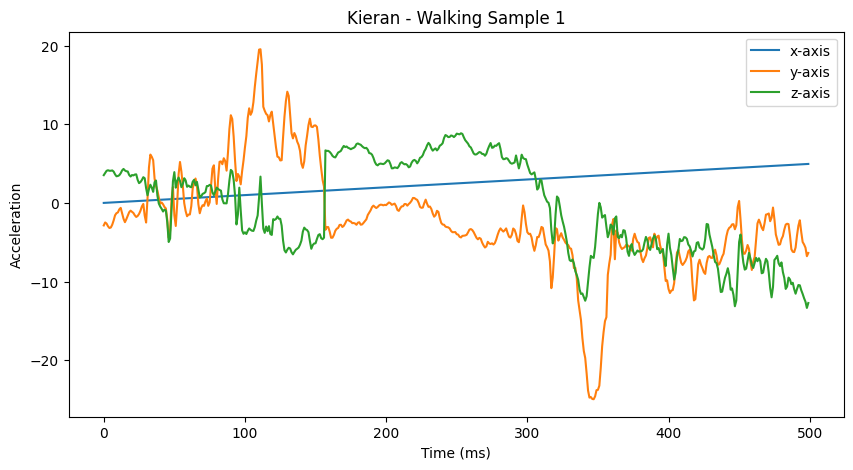

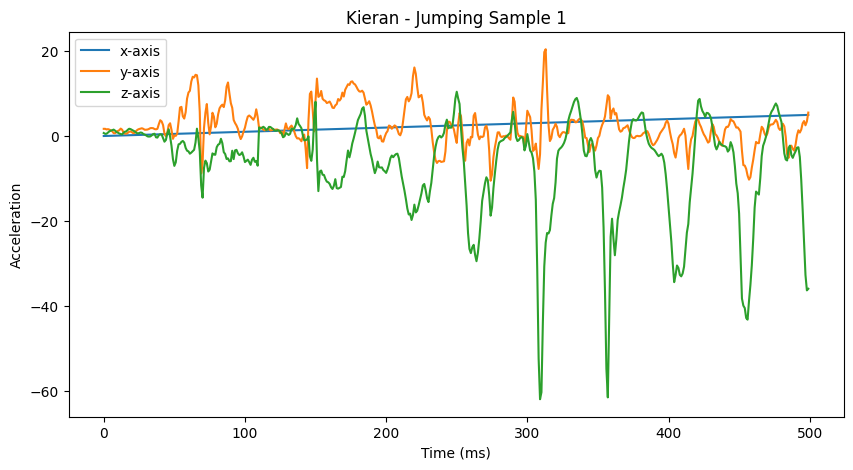

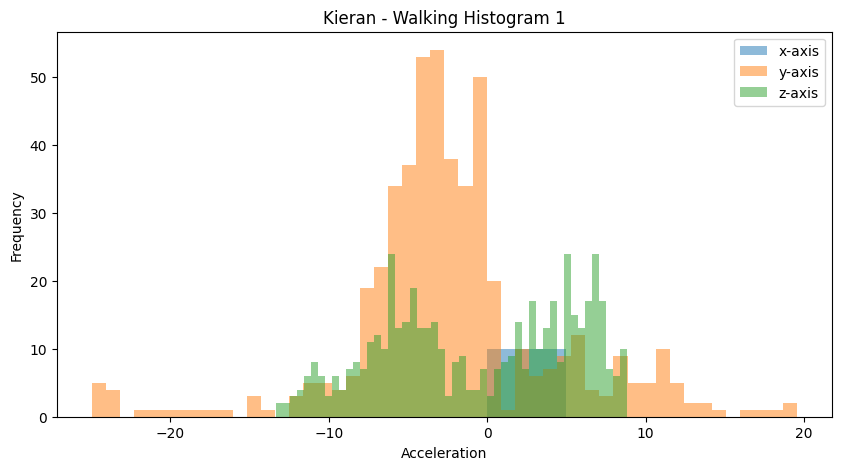

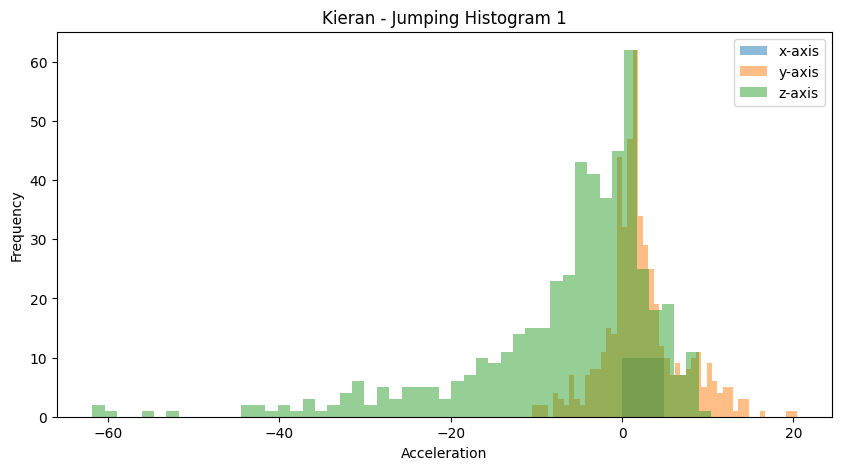

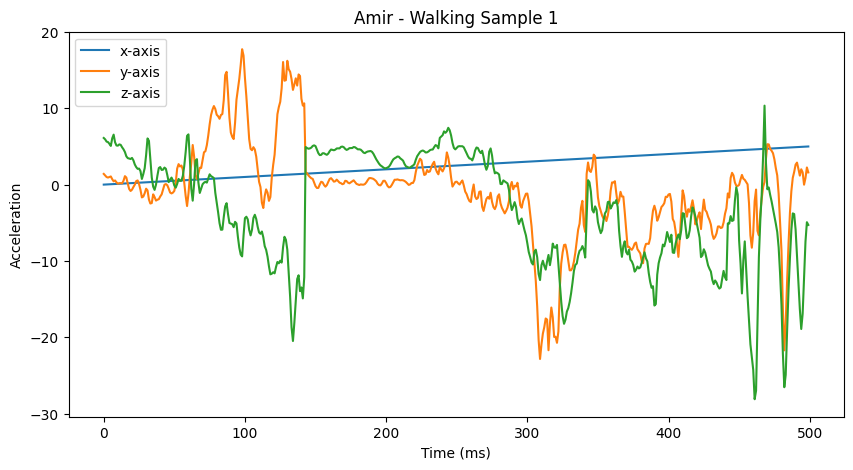

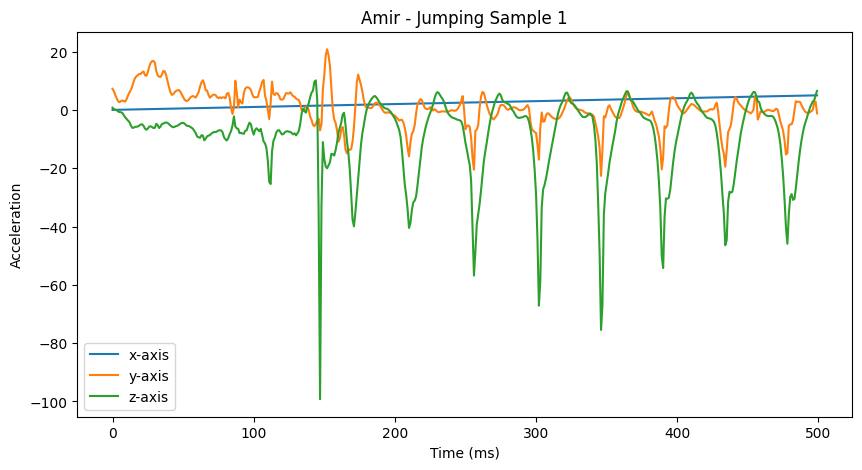

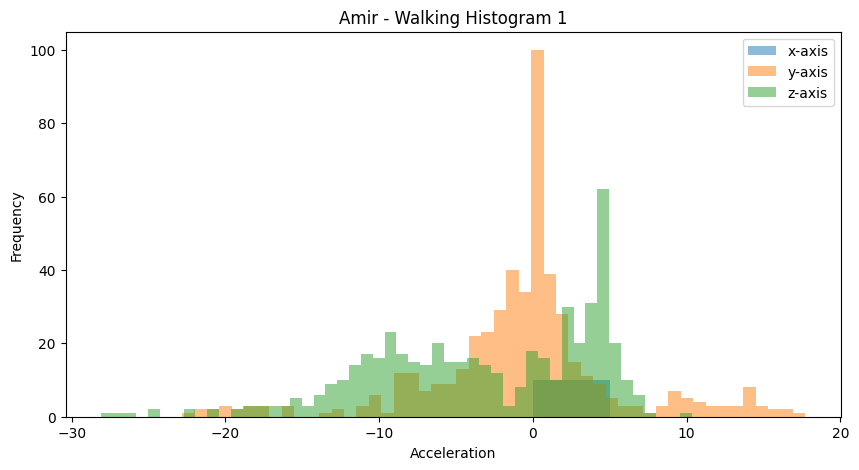

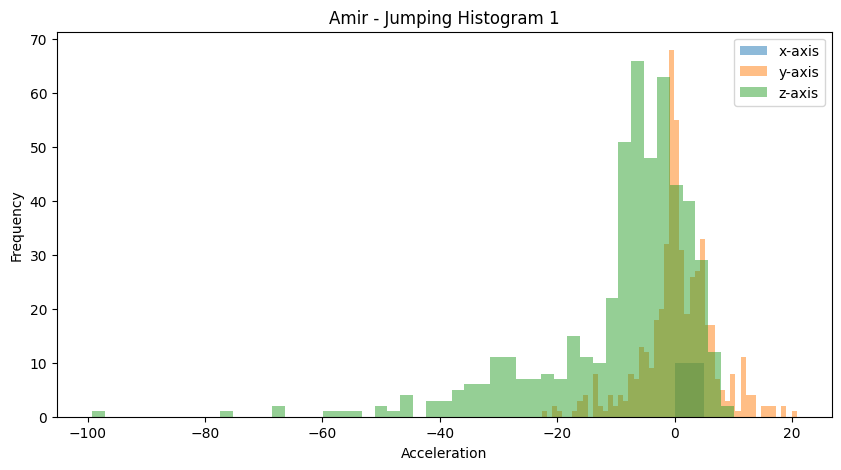

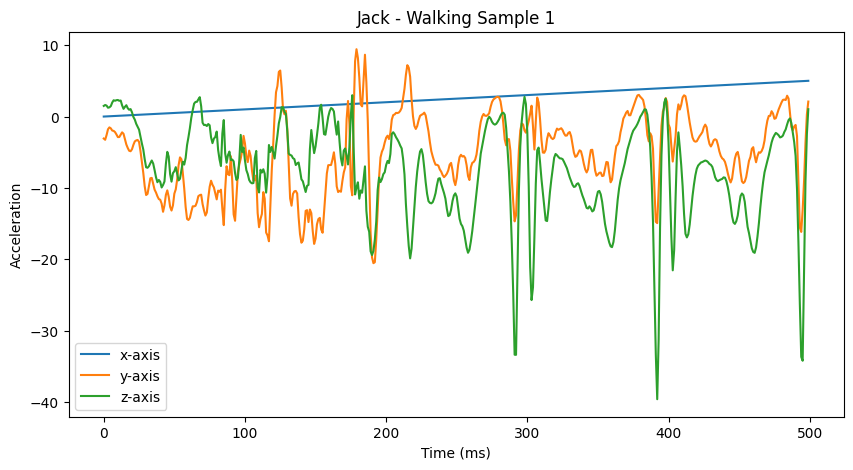

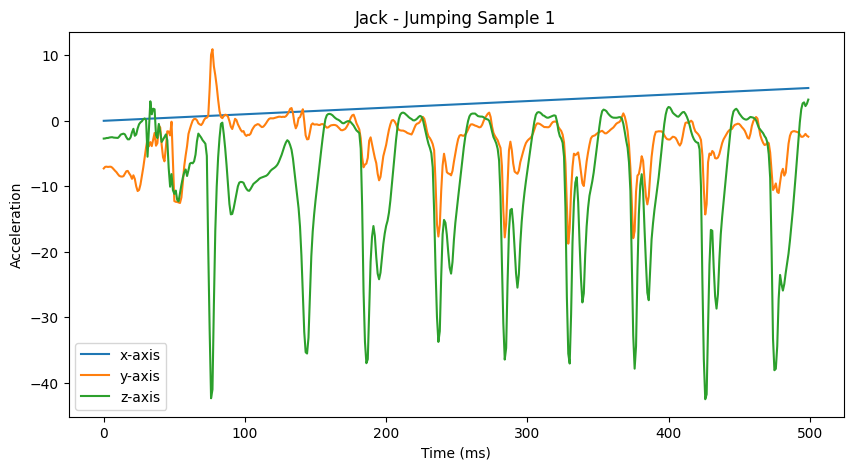

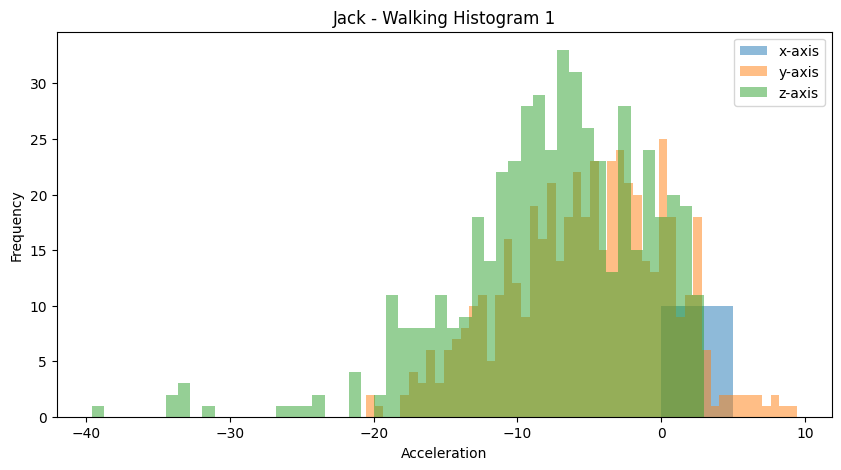

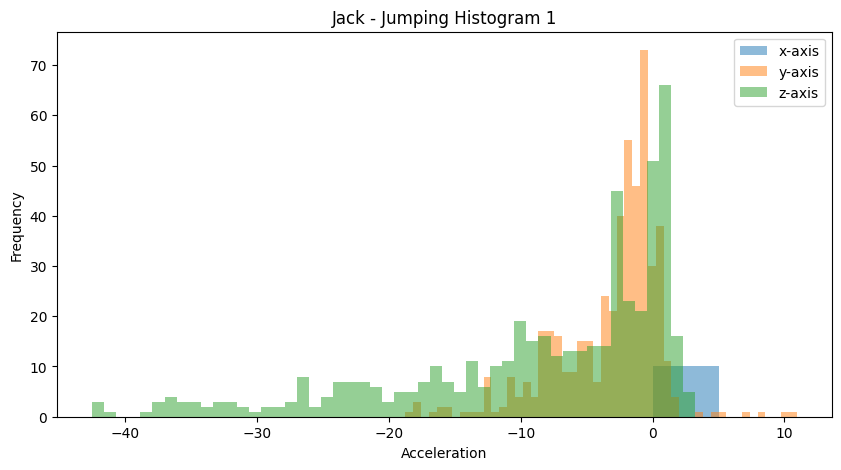

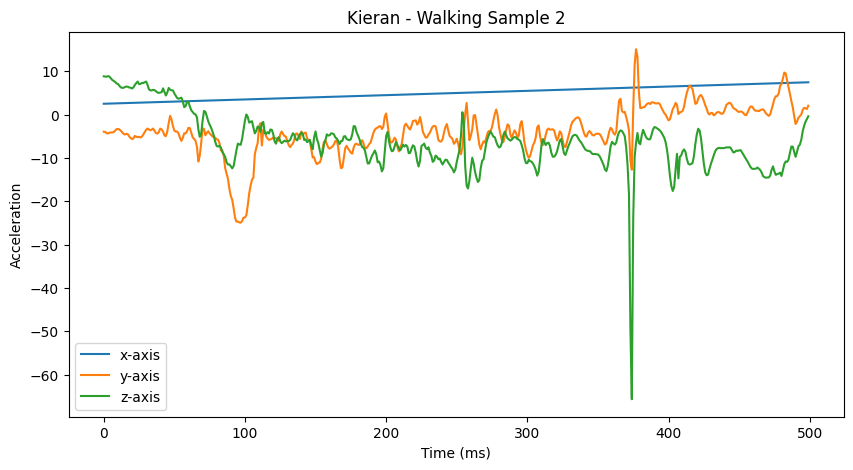

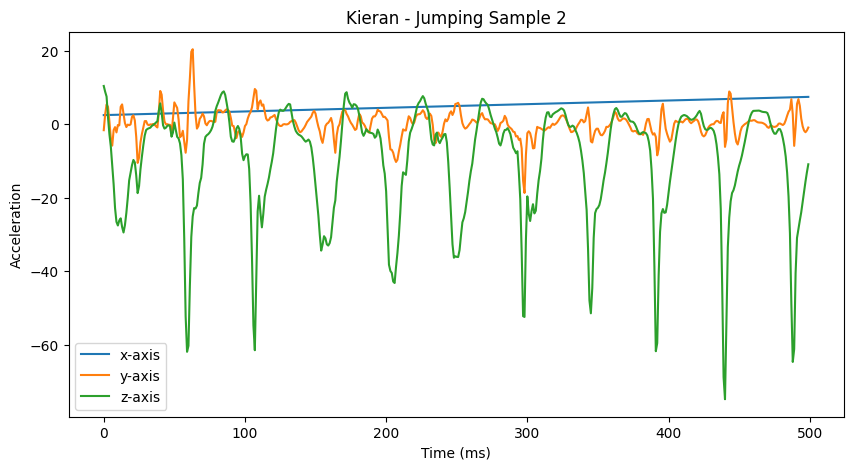

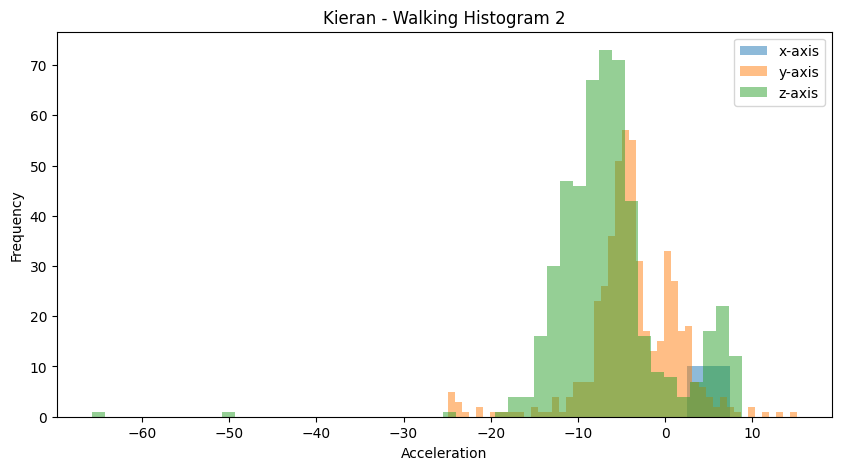

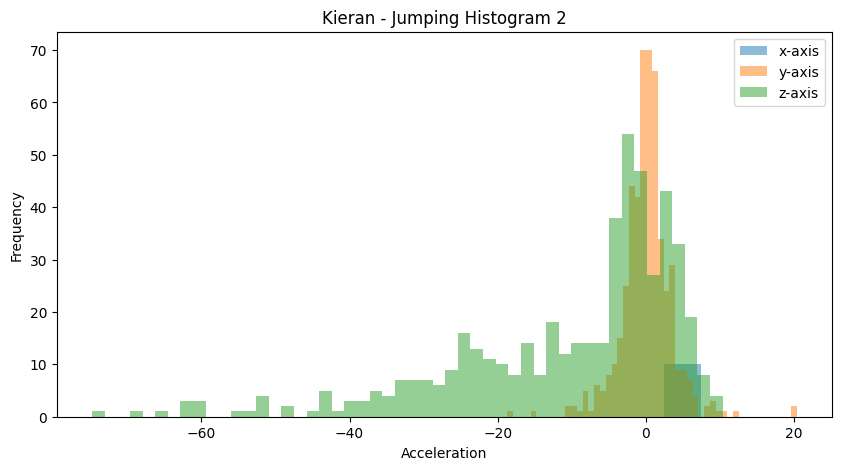

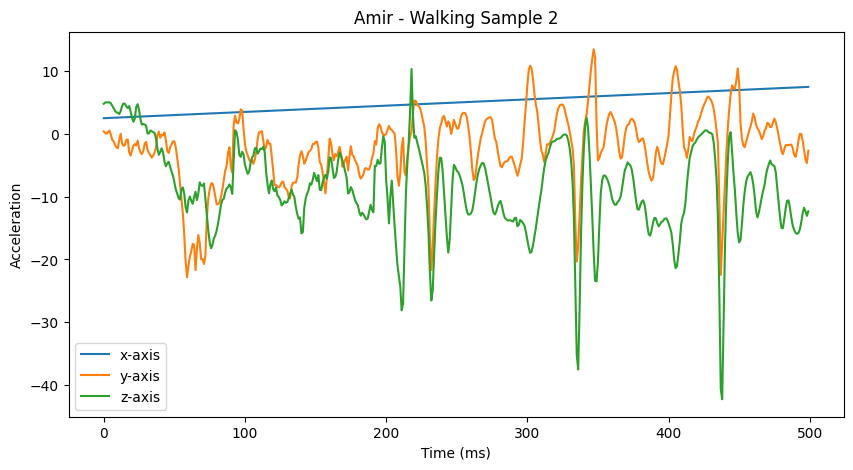

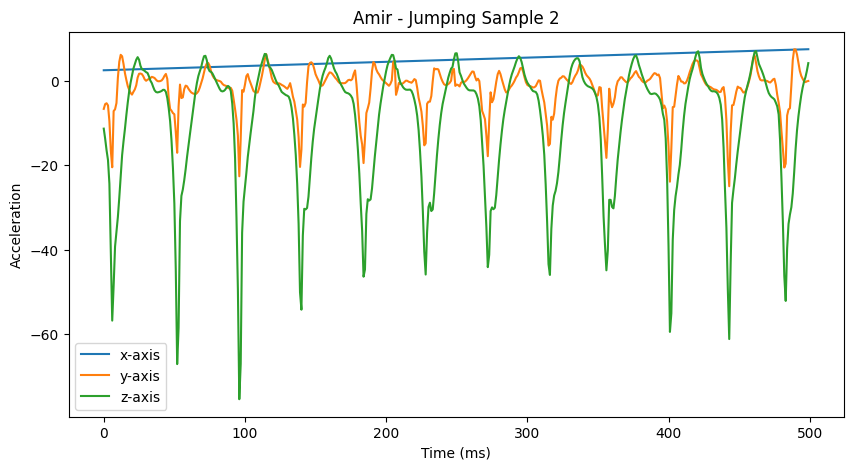

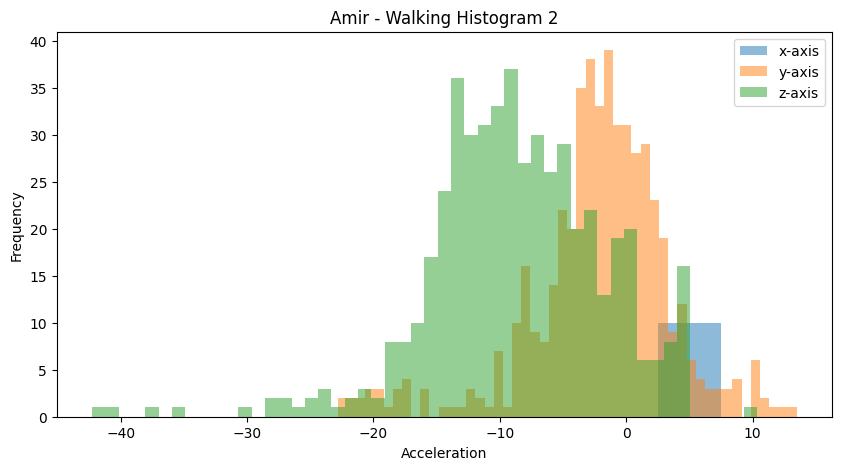

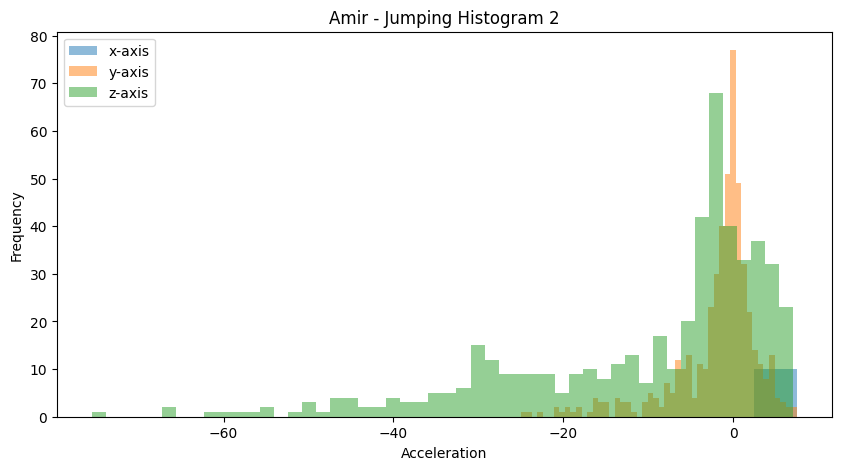

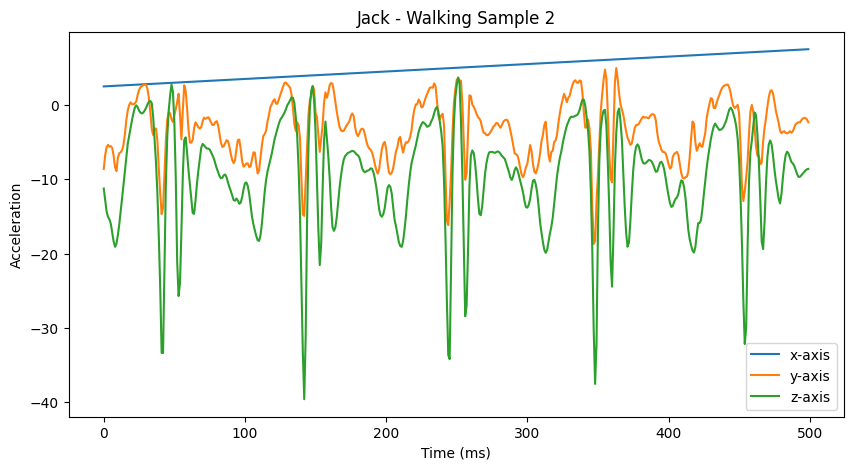

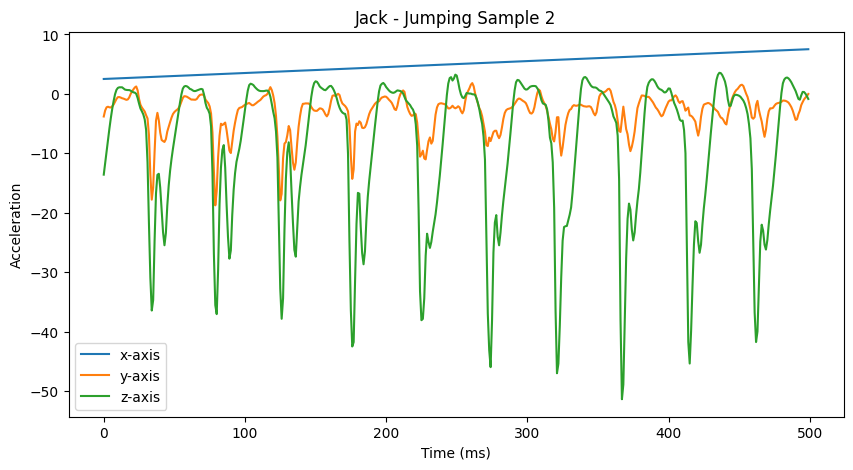

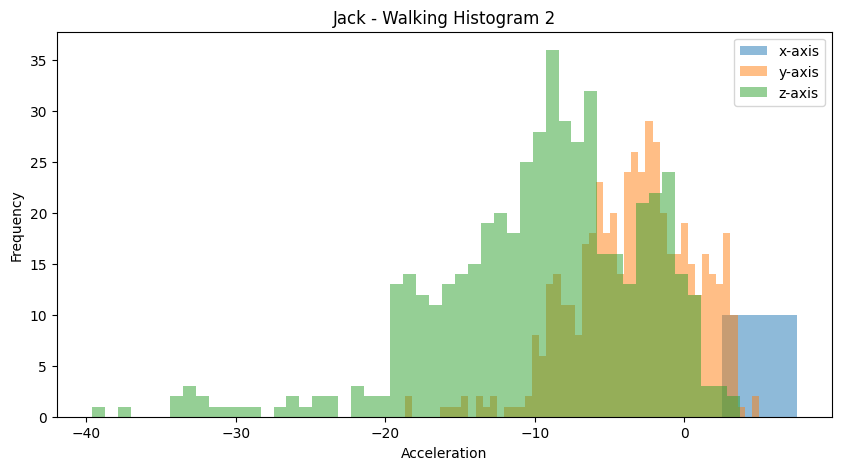

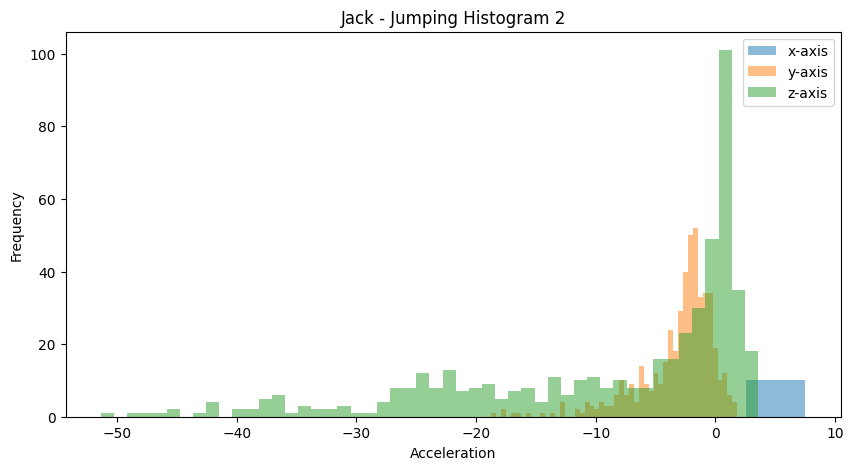

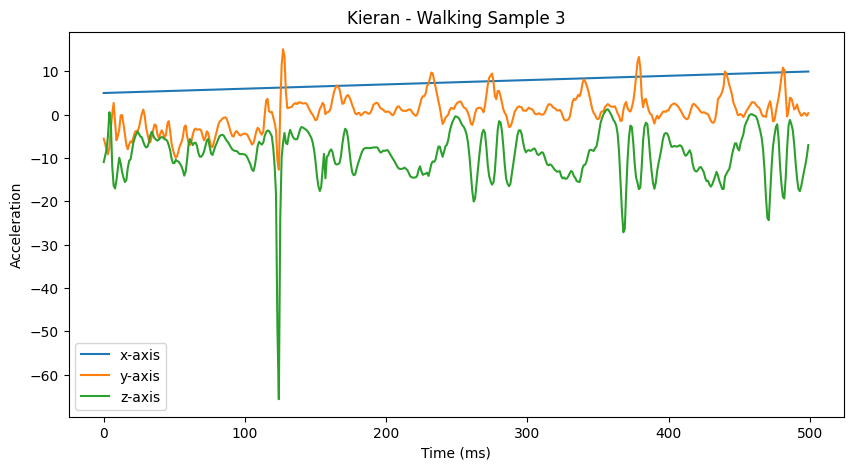

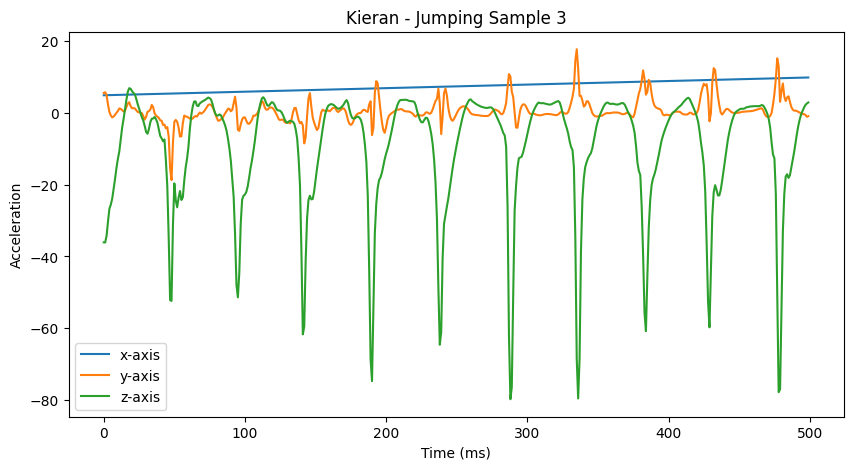

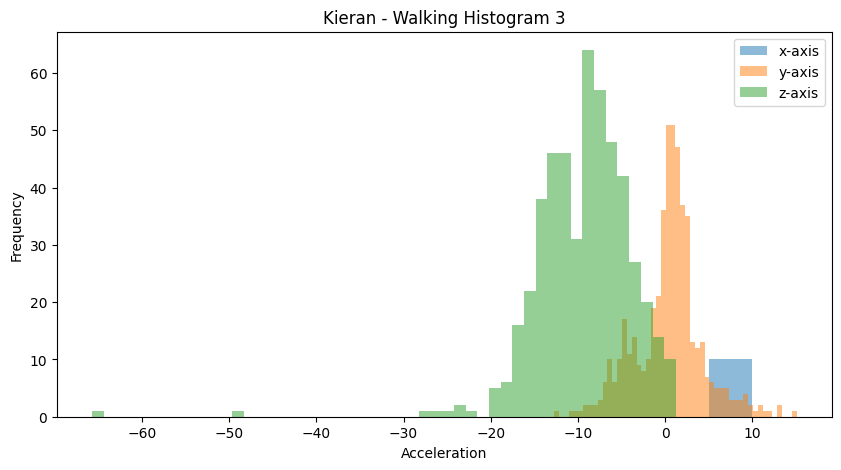

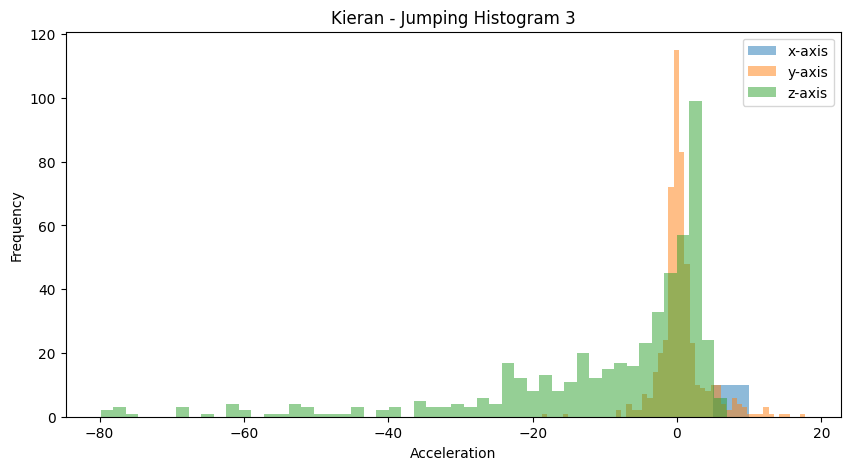

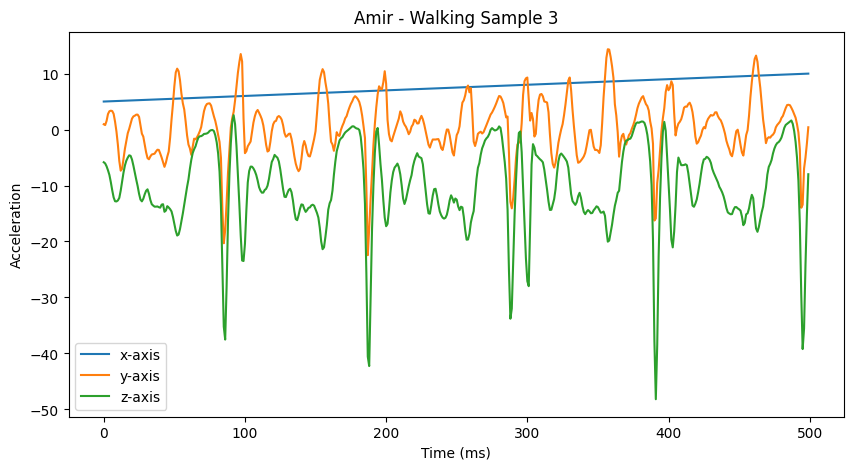

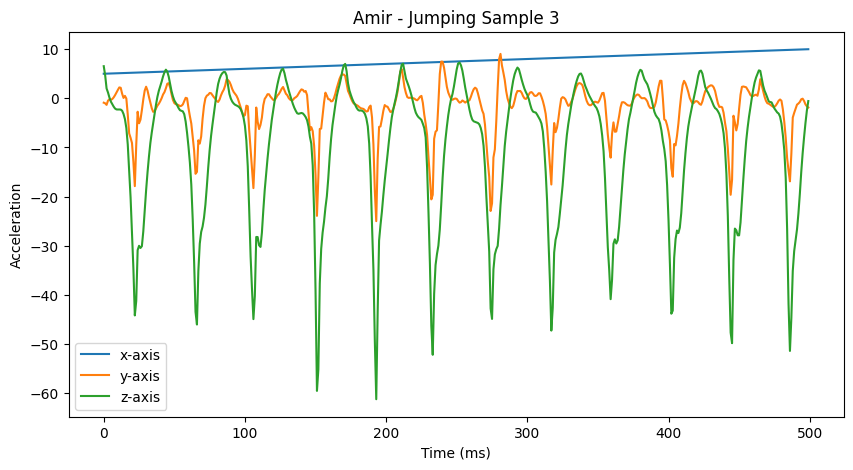

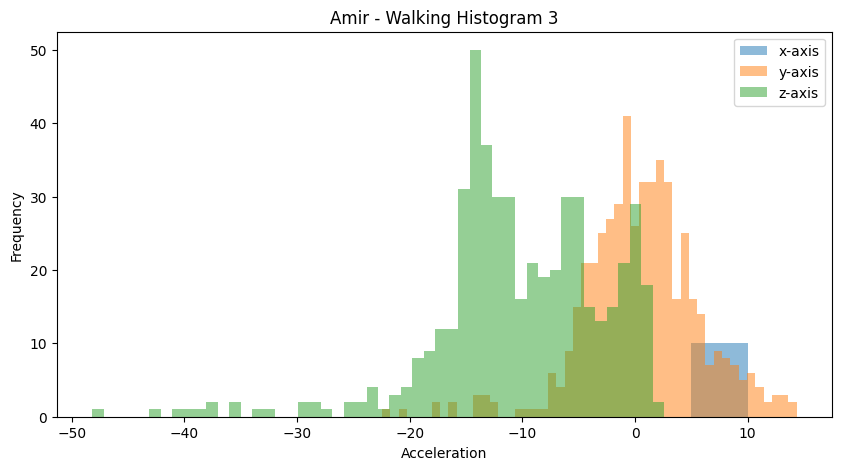

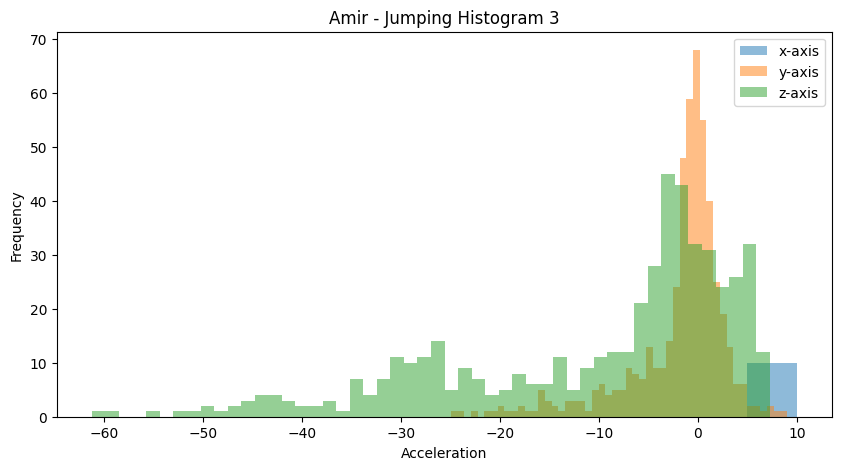

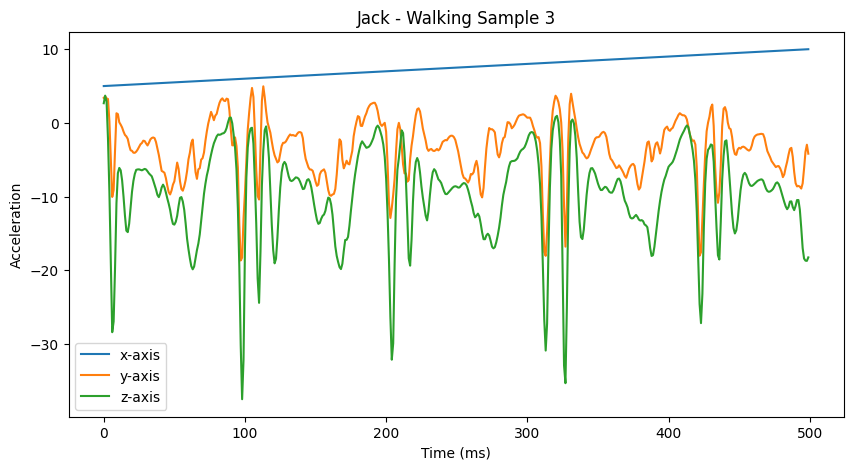

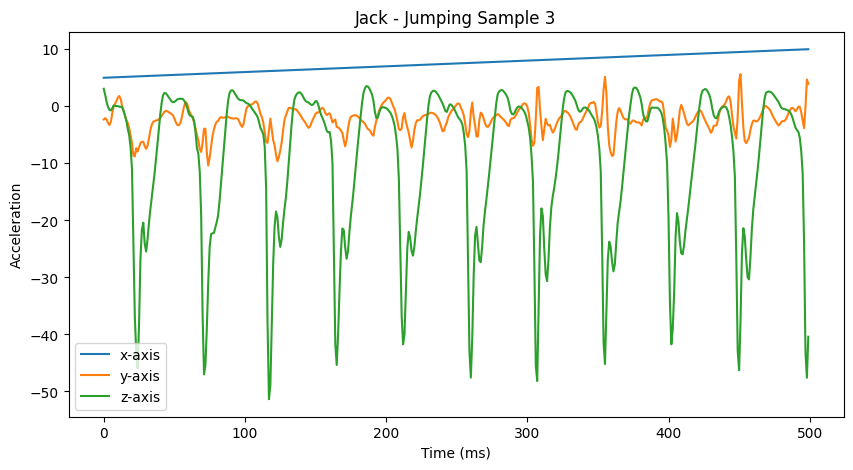

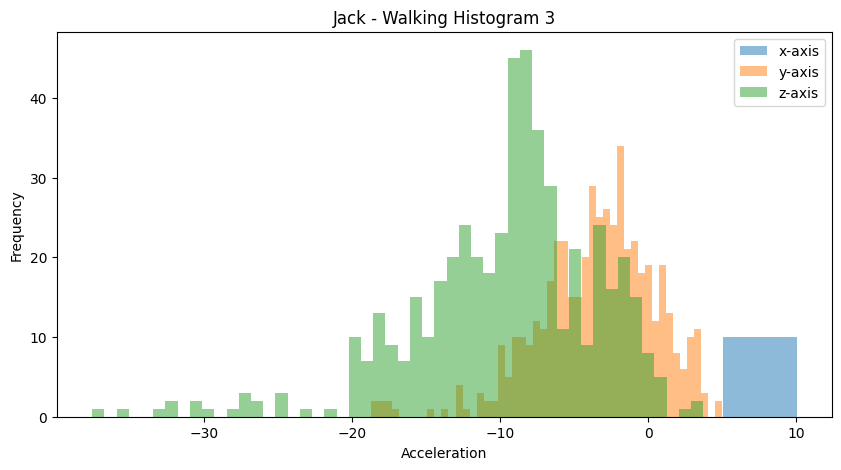

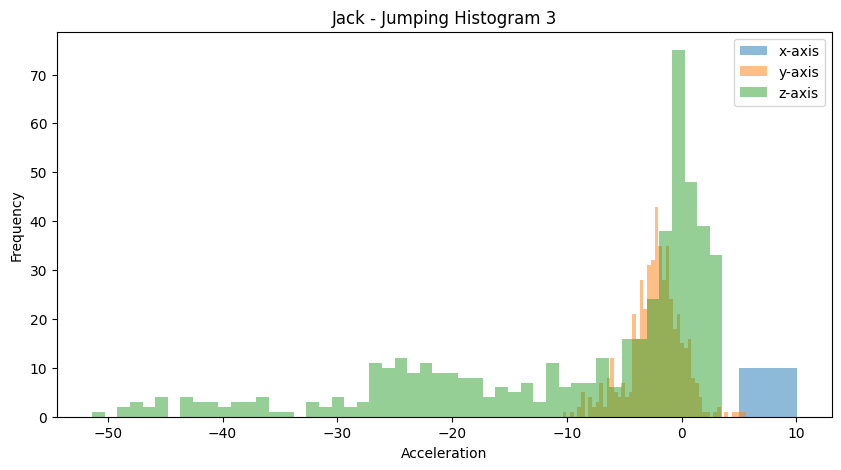

In [4]:
import h5py
import matplotlib.pyplot as plt

# Read segmented data from HDF5 file
with h5py.File('data.h5', 'r') as f:
    kieran_walking_segments = f['Kieran/walking'][:]
    kieran_jumping_segments = f['Kieran/jumping'][:]
    amir_walking_segments = f['Amir/walking'][:]
    amir_jumping_segments = f['Amir/jumping'][:]
    jack_walking_segments = f['Jack/walking'][:]
    jack_jumping_segments = f['Jack/jumping'][:]


# Function to plot acceleration vs. time for a sample
def plot_sample(sample, title):
    plt.figure(figsize=(10, 5))
    plt.plot(sample[:, 0], label='x-axis')
    plt.plot(sample[:, 1], label='y-axis')
    plt.plot(sample[:, 2], label='z-axis')
    plt.title(title)
    plt.xlabel('Time (ms)')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.show()


# Function to plot histogram of acceleration data
def plot_histogram(data, title, axis_labels=['x-axis', 'y-axis', 'z-axis'], bins=50):
    plt.figure(figsize=(10, 5))
    for i, label in enumerate(axis_labels):
        plt.hist(data[:, i], bins=bins, alpha=0.5, label=label)
    plt.title(title)
    plt.xlabel('Acceleration')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# Plot a few samples and histograms for each person and for both classes (walking and jumping)
for i in range(3):
    plot_sample(kieran_walking_segments[i], f'Kieran - Walking Sample {i+1}')
    plot_sample(kieran_jumping_segments[i], f'Kieran - Jumping Sample {i+1}')
    plot_histogram(kieran_walking_segments[i], f'Kieran - Walking Histogram {i+1}')
    plot_histogram(kieran_jumping_segments[i], f'Kieran - Jumping Histogram {i+1}')

    plot_sample(amir_walking_segments[i], f'Amir - Walking Sample {i+1}')
    plot_sample(amir_jumping_segments[i], f'Amir - Jumping Sample {i+1}')
    plot_histogram(amir_walking_segments[i], f'Amir - Walking Histogram {i+1}')
    plot_histogram(amir_jumping_segments[i], f'Amir - Jumping Histogram {i+1}')

    plot_sample(jack_walking_segments[i], f'Jack - Walking Sample {i+1}')
    plot_sample(jack_jumping_segments[i], f'Jack - Jumping Sample {i+1}')
    plot_histogram(jack_walking_segments[i], f'Jack - Walking Histogram {i+1}')
    plot_histogram(jack_jumping_segments[i], f'Jack - Jumping Histogram {i+1}')
    

In [9]:
# import h5py
#
# import pandas as pd
#
# import numpy as np
#
# from scipy import stats
#
# from sklearn.preprocessing import StandardScaler
#
#
# def data_filter(data, window_size):
#     filtered_data = []
#
#     for sample in data:
#
#         sample_data = []
#
#         for i in range(4):
#             window = sample[:, i]
#
#             # Remove outliers
#
#             z_scores = np.abs(stats.zscore(window))
#
#             window = window[z_scores < 3]
#
#             # Replace NaN values with the mean of the remaining values
#
#             window = pd.Series(window).astype(np.float64)
#
#             window[np.isnan(window)] = np.nanmean(window)
#
#             # Compute the simple moving average (SMA) of the data
#
#             window = window.rolling(window=window_size).mean()
#
#             # Normalize the data using the StandardScaler
#
#             scaler = StandardScaler()
#
#             window = scaler.fit_transform(window.values.reshape(-1, 1))
#
#             # Replace NaN values with linear interpolation
#
#             window = pd.Series(window.reshape(-1)).interpolate().values
#
#             sample_data.append(window)
#
#         # Pad the windows with zeros to ensure they have the same size
#
#         max_len = max([len(s) for s in sample_data])
#
#         padded_sample_data = [np.pad(s, (0, max_len - len(s))) for s in sample_data]
#
#         filtered_data.append(np.column_stack(padded_sample_data))
#
#     return np.array(filtered_data)
#
#
# def prepare_filtered_data(walking_data, jumping_data):
#     walking_data['label'] = 'walking'
#
#     jumping_data['label'] = 'jumping'
#
#     return pd.concat([walking_data, jumping_data], axis=0)
#
#
# import h5py
#
# # Open the HDF5 file in r+ mode
#
# f = h5py.File('data.h5', 'r+')
#
# # Extract the walking and jumping data from the 'Train' group
#
# train_walking_data = f['dataset/Train/Walking'][:]
#
# train_jumping_data = f['dataset/Train/Jumping'][:]
#
# # Extract the walking and jumping data from the 'Test' group
#
# test_walking_data = f['dataset/Test/Walking'][:]
#
# test_jumping_data = f['dataset/Test/Jumping'][:]
#
# # Filter the walking and jumping data using the data_filter function with a specified window size
#
# window_size = 5
#
# walking_filtered_train = data_filter(train_walking_data, window_size)
#
# jumping_filtered_train = data_filter(train_jumping_data, window_size)
#
# walking_filtered_test = data_filter(test_walking_data, window_size)
#
# jumping_filtered_test = data_filter(test_jumping_data, window_size)
#
# # Create new datasets with the filtered data
#
# dataset_group = f['dataset']
#
# training_group = dataset_group.create_group('Train_Filtered')
#
# training_group.create_dataset('walking_filtered', data=walking_filtered_train)
#
# training_group.create_dataset('jumping_filtered', data=jumping_filtered_train)
#
# testing_group = dataset_group.create_group('Test_Filtered')
#
# testing_group.create_dataset('walking_filtered', data=walking_filtered_test)
#
# testing_group.create_dataset('jumping_filtered', data=jumping_filtered_test)
#
# f.close()

import h5py 
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

def data_filter(data, window_size):
    filtered_data = []

    for sample in data:

        sample_data = []

        for i in range(4):
            window = sample[:, i]

            # Remove outliers
            z_scores = np.abs(stats.zscore(window))
            window = window[z_scores < 3]

            # Replace NaN values with the mean of the remaining values
            window = pd.Series(window).astype(np.float64)
            window[np.isnan(window)] = np.nanmean(window)

            # Compute the simple moving average (SMA) of the data
            window = window.rolling(window=window_size).mean()

            # Normalize the data using the StandardScaler
            scaler = StandardScaler()
            window = scaler.fit_transform(window.values.reshape(-1, 1))

            # Replace NaN values with linear interpolation
            window = pd.Series(window.reshape(-1)).interpolate().values

            sample_data.append(window)

        # Pad the windows with zeros to ensure they have the same size
        max_len = max([len(s) for s in sample_data])
        padded_sample_data = [np.pad(s, (0, max_len - len(s))) for s in sample_data]

        filtered_data.append(np.column_stack(padded_sample_data))

    return np.array(filtered_data)



def prepare_filtered_data_train(train_walking_data, train_jumping_data):
    train_walking_data['label'] = 0
    train_jumping_data['label'] = 1
    


    return pd.concat([train_walking_data, train_jumping_data], axis=0)


def prepare_filtered_data_test(test_walking_data, test_jumping_data):
   
    test_walking_data['label'] = 0
    test_jumping_data['label'] = 1


    return pd.concat([test_walking_data, test_jumping_data], axis=0)
   

f = h5py.File('data.h5', 'r')

# Load the walking and jumping data from CSV files
train_walking_data = f[f'dataset/Train']['Walking'][:]
train_jumping_data = f[f'dataset/Train']['Jumping'][:]
test_walking_data = f[f'dataset/Test']['Walking'][:]
test_jumping_data = f[f'dataset/Test']['Jumping'][:]

# Filter the walking and jumping data using the data_filter function with a specified window size
window_size = 5
walking_filtered_train = data_filter(train_walking_data, window_size)
jumping_filtered_train = data_filter(train_jumping_data, window_size)
walking_filtered_test = data_filter(test_walking_data, window_size)
jumping_filtered_test = data_filter(test_jumping_data, window_size)

filtered_train_df = prepare_filtered_data_train(pd.DataFrame(walking_filtered_train.reshape(-1, 4)),
                                    pd.DataFrame(jumping_filtered_train.reshape(-1, 4)))
filtered_train_df.to_csv(f'filtered_data_train.csv', index=False)

filtered_train_df = prepare_filtered_data_test(pd.DataFrame(walking_filtered_test.reshape(-1, 4)),
                                    pd.DataFrame(jumping_filtered_test.reshape(-1, 4)))
filtered_train_df.to_csv(f'filtered_data_test.csv', index=False)

In [9]:

import pandas as pd
import h5py
import numpy as np
from scipy import stats


def extract_features(data, label):
    features = np.zeros((data.shape[0], 10, 3))
    for i in range(data.shape[0]):
        window = data[i]
        for axis in range(1, 4):  # Iterate over x, y, and z axes
            axis_data = window[:, axis - 1]


            # Calculate the features for each axis
            max_value = np.max(axis_data)
            min_value = np.min(axis_data)
            range_value = max_value - min_value
            mean_value = np.mean(axis_data)
            median_value = np.median(axis_data)
            variance = np.var(axis_data)
            skewness = stats.skew(axis_data)
            rms = np.sqrt(np.mean(axis_data ** 2))
            kurtosis = stats.kurtosis(axis_data)
            std_dev = np.std(axis_data)

            # Add the features to the feature list
            features[i, :, axis - 1] = [max_value, min_value, range_value, mean_value, median_value,
                                        variance, skewness, rms, kurtosis, std_dev]

    # Combine features from all axes
    all_features = np.concatenate((features[:, :, 0], features[:, :, 1], features[:, :, 2]), axis=0)
    all_labels = np.full((all_features.shape[0], 1), label)
    all_features = np.hstack((all_features, all_labels))

    return all_features



filetred_train_data = pd.read_csv('filtered_data_test.csv')
filetred_test_data = pd.read_csv('filtered_data_test.csv')


# Check for NaN values in the data
#if np.isnan(filetred_train_data).any() or np.isnan(filetred_test_data).any():
        
    #print("Warning: NaN values found in the input data")

# Extract the features from the walking, jumping, and test data with labels
train_walking_features = extract_features(filetred_train_data, 0)
train_jumping_features = extract_features(filetred_train_data, 1)
test_walking_features = extract_features(filetred_test_data, 0)
test_jumping_features = extract_features(filetred_test_data, 1)

# Combine both walking and jumping data for training and testing
train_features = np.concatenate((train_walking_features, train_jumping_features), axis=0)
test_features = np.concatenate((test_walking_features, test_jumping_features), axis=0)

# Save the extracted features to CSV files
np.savetxt(f'train_features.csv', train_features, delimiter=',')
np.savetxt(f'test_features.csv', test_features, delimiter=',')
f.close()

KeyError: 0